## Movie Review Classification

![This is getting exciting](https://i.kinja-img.com/gawker-media/image/upload/s--hIgTSFEs--/c_fit,fl_progressive,q_80,w_320/17j2zn73qxdlfgif.jpg)

Using all that we have learned, we will now combine our techniques to perform some basic classifcation! We'll be using the nltk movie reviews data set, we will classify positive and negative reviews. 

In [1]:
import nltk
from nltk.corpus import movie_reviews as reviews
x = [reviews.raw(fileid) for fileid in reviews.fileids()]
y = [reviews.categories(fileid)[0] for fileid in reviews.fileids()]

In [2]:
#print a positive review
for i in range(len(y)):
    if y[i] == "pos":
        print (x[i])
        break

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almost as 

In [5]:
#print a negative review
for e in range(len(y)):
    if y[e] == "neg":
        print (x[e])
        break    

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

2 - Using the scikit train_test_split function (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), split the data into a training set and a test set. 

In [3]:
#split the data into a training set and a test set.
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#binary the label "neg" and "pos" into 0 and 1 
lb = preprocessing.LabelBinarizer()
y=lb.fit_transform(y)
y=y.reshape(2000)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [4]:
type(x)

list

3 - Then lemmatize or stem the reviews, and transform the documents to tf-idf.

In [5]:
#stem the reviews
from nltk.stem.porter import PorterStemmer
#lemmatizer = WordNetLemmatizer()
stemmer=PorterStemmer()

In [6]:
from nltk import sent_tokenize
import re
#clean x_train reviews
x_train_words_only = [re.sub("[^a-zA-Z]", " ", t) for t in x_train]
x_train_words_only[-1]
len(x_train_words_only)    
x_train_words_only[0]

'books could be   and indeed have been written about the star wars trilogy   and rightfully so    this is a set of movies that shattered all expectations of what science fiction could be in the late   s early   s   inspiring literally dozens of clones   from battlestar galactica all the way up to stargate and independance day   and one could argue revitalizing the whole science fiction genre    the special effects were groundbreaking   revolutionary for their day and still eminently watchable well into twenty years later    literally millions of people have seen the star wars trilogy and been touched by it    and now   george lucas brings it back for a new audience to enjoy    much has been and is still being made of the fact that mr   lucas has gone back and revised his trilogy for rerelease now    some fans are angry that he has dared to meddle with what they consider perfection   while others are thrilled by the idea of seeing yesterday s star wars updated with today s special effec

In [12]:
#tokenize x_train reviews
token_x_train=[nltk.word_tokenize(d)for d in x_train_words_only]
#print(len(token_x_train))
#print(token_x_train[0])




In [14]:
token_x_train[0]

['books',
 'could',
 'be',
 'and',
 'indeed',
 'have',
 'been',
 'written',
 'about',
 'the',
 'star',
 'wars',
 'trilogy',
 'and',
 'rightfully',
 'so',
 'this',
 'is',
 'a',
 'set',
 'of',
 'movies',
 'that',
 'shattered',
 'all',
 'expectations',
 'of',
 'what',
 'science',
 'fiction',
 'could',
 'be',
 'in',
 'the',
 'late',
 's',
 'early',
 's',
 'inspiring',
 'literally',
 'dozens',
 'of',
 'clones',
 'from',
 'battlestar',
 'galactica',
 'all',
 'the',
 'way',
 'up',
 'to',
 'stargate',
 'and',
 'independance',
 'day',
 'and',
 'one',
 'could',
 'argue',
 'revitalizing',
 'the',
 'whole',
 'science',
 'fiction',
 'genre',
 'the',
 'special',
 'effects',
 'were',
 'groundbreaking',
 'revolutionary',
 'for',
 'their',
 'day',
 'and',
 'still',
 'eminently',
 'watchable',
 'well',
 'into',
 'twenty',
 'years',
 'later',
 'literally',
 'millions',
 'of',
 'people',
 'have',
 'seen',
 'the',
 'star',
 'wars',
 'trilogy',
 'and',
 'been',
 'touched',
 'by',
 'it',
 'and',
 'now',
 'ge

In [11]:
from nltk.tokenize.moses import MosesDetokenizer
detokenizer = MosesDetokenizer()
#stem review in train dataset
stem_x_train=[]
for h in range(1600):
             stem_x=[stemmer.stem (n) for n in token_x_train[h]]
             wwwd=detokenizer.detokenize(stem_x, return_str=True)
             stem_x_train.append(wwwd)

In [12]:
len(stem_x_train)

1600

In [22]:
#comparison with original text
stem_x_train[-1]

'last night could have an aka tag on the end of it that say it s the end of the world and we feel fine last night is about just that the last night of planet earth s exist the world is go to end at precis midnight januari st how scientist were so accur abl to predict when thi catastroph event would occur is never explain nor is the event itself throughout the entir movi no explan is given as to whi thi is happen in do thi mckellar who also wrote and direct the film seem to be tri to transcend the genr he s attempt to make a film about peopl and how each of them deal with their last night of life the film contain no scienc fiction element which allow the viewer to concentr on the feel and action of the charact mckellar is larg success in hi attempt to rise abov hi materi the film is set in toronto and follow sever peopl in their variou escapad on the last night of exist there s mckellar who play a man who just want to be alon when the moment occur but keep get interrupt by a woman sandr

In [23]:
x_train[-1]

' " last night " could have an " aka " tagged on the end of it that says , " it\'s the end of the world , and we feel fine " . \n " last night " is about just that . \nthe last night of planet earth\'s existence . \nthe world is going to end at precisely midnight , january 1st , 2000 . \nhow scientists were so accurately able to predict when this catastrophic event would occur is never explained . \nnor is the event itself . \nthroughout the entire movie , no explanation is given as to why this is happening . \nin doing this , mckellar ( who also wrote and directed the film ) seems to be trying to transcend the genre . \nhe\'s attempted to make a film about people , and how each of them deals with their last night of life . \nthe film contains no science fiction elements , which allows the viewer to concentrate on the feelings and actions of the characters . \nmckellar is largely successful in his attempt to rise above his material . \nthe film is set in toronto , and follows several p

In [108]:
#clean x_test reviews
x_test_words_only = [re.sub("[^a-zA-Z]", " ", t) for t in x_test]
x_test_words_only[-1]
len(x_test_words_only)

400

In [109]:
#tokenize x_test reviews
token_x_test=[nltk.word_tokenize(d)for d in x_test_words_only]

In [110]:
#stem x_test reviews
stem_x_test=[]
for h in range(len(x_test_words_only)):
             stem_xt=[stemmer.stem (n) for n in token_x_test[h]]
             wwwd=detokenizer.detokenize(stem_xt, return_str=True)
             stem_x_test.append(wwwd)

In [111]:
len(stem_x_test)

400

In [112]:
#transform the documents to tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
vectorised_x=[]
vectorised_train = vectorizer.fit_transform(stem_x_train)
vectorised_train.shape

(1600, 23435)

In [113]:
vectorised_test = vectorizer.transform(stem_x_test)
vectorised_test.shape

(400, 23435)

4 - Finally, build a model. To start, use a logistic regression (which we will review in detail in the coming lectures) (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [114]:
#build the logistic regressio model 1
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
model1=logreg.fit(vectorised_train,y_train )
model1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
vectorised_train.shape

NameError: name 'vectorised_train' is not defined

In [115]:
y_pred = logreg.predict(vectorised_test)

In [116]:
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[172,  35],
       [ 35, 158]])

The result of confusion_matrix tells that this model has 172+158 correct predictions and 35+35 incorrect predictions

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.83      0.83       207
          1       0.82      0.82      0.82       193

avg / total       0.82      0.82      0.82       400



The precision is the ratio tp / (tp + fp). So 82% of positive reviews are labeled positive among all reviews labeled as positive. The recall is the ratio tp / (tp + fn), so 82% of positive reviews are labeled positive among all reviews labeled right.

5 - Measure the efficacy of your model using the Reciever Operator Characteristic (ROC) Area Under the Curve (AUC). Report this metric on the test set of your data.

For more info on this, see: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

In [125]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_b)

0.89359465345047684

In [120]:
y_pred_b=logreg.predict_proba(vectorised_test)
y_pred_b=y_pred_b[:,1]

In [121]:
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, y_pred_b)

In [124]:
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc1

0.89359465345047684

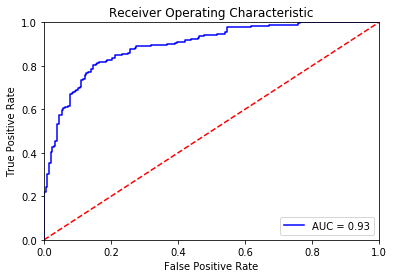

In [154]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

6 - Change a parameter in your model (introduce regularization) or change a parameter in your word vector transformation (http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Try introducing the use of stop words, or employing a cutoff on terms with min or max df.

In [127]:
#model2 change the penalty 
logreg2 = LogisticRegression(penalty='l1')
model2=logreg2.fit(vectorised_train,y_train )
y_pred_2 = logreg2.predict(vectorised_test)

In [128]:
print(classification_report(y_test, y_pred_2))

             precision    recall  f1-score   support

          0       0.82      0.71      0.76       207
          1       0.73      0.83      0.78       193

avg / total       0.77      0.77      0.77       400



In [138]:
#model3 adding stop_words in TfidfVectorizer
vectorizer2=TfidfVectorizer(stop_words='english')
vectorised_train2 = vectorizer2.fit_transform(stem_x_train)
vectorised_test2 = vectorizer2.transform(stem_x_test)
logreg = LogisticRegression()
model3=logreg.fit(vectorised_train2,y_train )
y_pred_3 = model3.predict(vectorised_test2)

In [139]:
print(classification_report(y_test, y_pred_3))

             precision    recall  f1-score   support

          0       0.84      0.84      0.84       207
          1       0.83      0.82      0.83       193

avg / total       0.83      0.83      0.83       400



In [144]:
#model4 change more parameters in TfidfVectorizer
vectorizer3=TfidfVectorizer(ngram_range=(1,3),min_df=.0025, max_df=.1,stop_words='english')
vectorised_train3 = vectorizer3.fit_transform(stem_x_train)
vectorised_test3 = vectorizer3.transform(stem_x_test)
logreg = LogisticRegression()
model4=logreg.fit(vectorised_train3,y_train )
y_pred_4 = model4.predict(vectorised_test3)

In [147]:
print(classification_report(y_test, y_pred_4))

             precision    recall  f1-score   support

          0       0.80      0.83      0.81       207
          1       0.81      0.78      0.79       193

avg / total       0.81      0.81      0.80       400



7 - Make four models in total, changing parameters and comparing the AUC results. Report your findings in a tabular form.

In [134]:
#auc of model1
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc1

0.89359465345047684

In [135]:
y_pred_b2=logreg2.predict_proba(vectorised_test)
y_pred_b2=y_pred_b2[:,1]
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_pred_b2)

In [136]:
#auc of model2
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc2

0.8412054767089685

In [140]:
y_pred_b3=logreg.predict_proba(vectorised_test2)
y_pred_b3=y_pred_b3[:,1]
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, y_pred_b3)

In [141]:
roc_auc3 = metrics.auc(fpr3, tpr3)
roc_auc3

0.89269354959825786

In [145]:
y_pred_b4=logreg.predict_proba(vectorised_test3)
y_pred_b4=y_pred_b4[:,1]
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test, y_pred_b4)

In [146]:
roc_auc4 = metrics.auc(fpr4, tpr4)
roc_auc4

0.87054141323120804

In [167]:
#!pip install tabulate
from tabulate import tabulate
print( tabulate([["AUC1", 0.893], ["AUC2", 0.841],["AUC3",0.892],["AUC4", 0.870]]))

----  -----
AUC1  0.893
AUC2  0.841
AUC3  0.892
AUC4  0.87
----  -----


The four models all have AUC more than 80%, that means they all distinguish labels good. The highest one is the model one, which is very close to AUC OF the third model. The third model adds stop_words in the tfidfvectorier parameter but the result shows that it does not have a very big impact. The second model changes penalty from l2 to l1, then it  has relative big difference than others due to the change of penalty term.l1 regularization helps to perform feature selection, but in this case l2 is better. 
 

Problem:During the process of runing the model several times, I also found that sometimes the efficacy changes a lot. Just take model one for example, now the AUC is 0.89 but one time it turned to be 0.82.And in that case, the precision and recall decreased to average 0.49. While when I ran it again, it turned to good again. I am not sure whether it's that when spliting the data into train and test, some random test reviews are more easy for the model to classify.